In [13]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score

# Load the data set
df = pd.read_csv("heart.csv")

# Define the target and features
target = 'target'
features = df.columns.tolist()
features.remove(target)

# Split the data into training and testing sets
X = df[features]
y = df[target]

In [3]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Create and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8688524590163934


In [5]:
# Cross validation
model = RandomForestClassifier()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")

print("Cross Validation Accuracy: ", scores.mean())


Cross Validation Accuracy:  0.81828231292517


In [ ]:
# Training and Evaluating the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Test score accuracy: ", accuracy_score(y_test, y_pred))

In [8]:
# Classification Accuracy of the algorithms

# initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, random_state=42)
}

# Function to evaluate models
def evaluate_models(X_train, X_test, y_train, y_test, models):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy
    return results


# TRAINING AND TESTING SPLIT
_Purpose_
The primary purpose of splitting the dataset into training and testing sets is to evaluate the model's performance on unseen data. This helps in understanding how well the model generalizes to new data.

_How it works_
1.Training Set: A portion of the dataset used to train the model. The model learns the underlying patterns and relationships from this data.

2.Testing Set: A separate portion of the dataset used to evaluate the model's performance. This data is not seen by the model during training, providing an unbiased assessment of its generalization capability.

_Typical split ratio_
A common split ratio is 70% for training and 30% for testing. Other popular ratios include 80/20 and 75/25.
The choice of ratio can depend on the size of the dataset. For very large datasets, even a small percentage can provide a substantial test set.

In [9]:
# 1. Training and Testing Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_test_results = evaluate_models(X_train, X_test, y_train, y_test, models)
print("Training and Testing Split Results:", train_test_results)

Training and Testing Split Results: {'Logistic Regression': 0.8131868131868132, 'Decision Tree': 0.7362637362637363, 'Random Forest': 0.8241758241758241, 'KNN': 0.6593406593406593, 'SVM': 0.7032967032967034}


# CROSS VALIDATION
_Purpose_:
Cross-validation is used to assess the generalizability of a model. Instead of splitting the dataset into a single training set and a single test set, cross-validation divides the dataset into multiple folds, trains the model on some folds, and tests it on the remaining fold. This process is repeated several times, and the results are averaged to provide a more reliable estimate of model performance.

_How it works_
1.The dataset is divided into k subsets (folds).
2.The model is trained on k-1 folds and tested on the remaining fold.
3.This process is repeated k times, with each fold used exactly once as the test set.
4.The performance metrics (e.g., accuracy, precision, recall) are averaged over all k runs to get a final evaluation score.


In [10]:
# 2. Cross-Validation
cross_val_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    cross_val_results[name] = scores.mean()
print("Cross-Validation Results:", cross_val_results)

Cross-Validation Results: {'Logistic Regression': 0.8282513661202187, 'Decision Tree': 0.755464480874317, 'Random Forest': 0.8381967213114756, 'KNN': 0.643879781420765, 'SVM': 0.6434972677595628}


# STRATIFIED SPLITTING / STRATIFIED CROSS VALIDATION
_Purpose_:
Stratified splitting ensures that each fold of the dataset maintains the same proportion of classes as the original dataset. This is particularly important for classification problems where the class distribution is imbalanced.

_How it works_
The dataset is divided into k folds in such a way that each fold has approximately the same percentage of samples of each target class as the original dataset.
The model is trained and validated using these stratified folds.

Note: Imbalanced Dataset;
      is a dataset where the distribution of classes is not uniform. In other words, one class significantly outnumbers the other class(es).
      e.g:Medical Diagnosis: In medical datasets, the number of patients with a rare disease (positive class) is often much smaller than the number of healthy patients (negative class).

In [11]:
# 3. Stratified Splitting
skf = StratifiedKFold(n_splits=5)
stratified_results = {}
for name, model in models.items():
    accuracies = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
    stratified_results[name] = np.mean(accuracies)
print("Stratified Cross-Validation Results:", stratified_results)

Stratified Cross-Validation Results: {'Logistic Regression': 0.8282513661202187, 'Decision Tree': 0.755464480874317, 'Random Forest': 0.8381967213114756, 'KNN': 0.643879781420765, 'SVM': 0.6434972677595628}


In [15]:
# Evaluate the metrics
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1_score': f1_score,
    'ROC AUC': roc_auc_score
}

In [17]:
"""_summary_
steps:
1.Train the Models: Fit each model to the training data.
2.Predict on Test Data: Use the trained model to predict the target variable for the test data.
3.Calculate Metrics: Calculate the performance metrics using the true and predicted values of the target variable.
"""

# Split the data into training and testing sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dictionary to store the results
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    model_results = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1_score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_prob) if y_prob is not None else 'N/A'
    }
    
    # Store the results
    results[name] = model_results


In [18]:
for model_name, model_results in results.items():
    print(f"Results for {model_name}:")
    for metric_name, value in model_results.items():
        print(f"  {metric_name}: {value:.4f}")
    print()

Results for Logistic Regression:
  Accuracy: 0.8132
  Precision: 0.8235
  Recall: 0.8400
  F1_score: 0.8317
  ROC AUC: 0.8820

Results for Decision Tree:
  Accuracy: 0.7363
  Precision: 0.7955
  Recall: 0.7000
  F1_score: 0.7447
  ROC AUC: 0.7402

Results for Random Forest:
  Accuracy: 0.8242
  Precision: 0.8400
  Recall: 0.8400
  F1_score: 0.8400
  ROC AUC: 0.9095

Results for KNN:
  Accuracy: 0.6593
  Precision: 0.6792
  Recall: 0.7200
  F1_score: 0.6990
  ROC AUC: 0.7132

Results for SVM:
  Accuracy: 0.7033
  Precision: 0.6716
  Recall: 0.9000
  F1_score: 0.7692
  ROC AUC: 0.7946



In [ ]:
# Actionable insight of the models
# LR
# Best performed model : Logistic Regression
# Precision (0.08), Recall (0.90), f1_score (0.89), ROC AUC (0.91)

# Balance model performance:
#
# KNN

# SVM

# DT

# RF

# Conclusion
# Logistic regression is the best performer model with the higest core metrics

#

# Recommendation
# Models considered for deployment

# Furtur funing of the models

# Ensemble methods, enhancing performance nd robustness 

# REGRESSION 
  Regression is a type of supervised learning used to predict continuous outcomes.
  The goal of regression is to model the relationship between the dependent variable (also called the target or outcome variable) and one or more independent variables (also called features or predictors).

_Key Points:_
1. Output: Continuous numeric values (e.g., predicting house prices, temperature, stock prices).

2. Objective: Minimize the difference between the predicted and actual values, often measured using metrics     like Mean Squared Error (MSE) or Mean Absolute Error (MAE).  

_Examples of Regression Algorithms:_
1. Linear Regression: Models the relationship between the dependent variable and one or more independent variables using a linear equation.

2. Polynomial Regression: A type of linear regression where the relationship is modeled as an nth degree polynomial.

3. Ridge Regression: A type of linear regression that includes a regularization term (L2) to prevent overfitting.

4. Lasso Regression: Similar to Ridge Regression but uses L1 regularization to enforce sparsity (some coefficients are exactly zero).

In [1]:
# Supervised Learning algorithms
# 1. Regression - Linear or Polynomial
#   Linear Regression is a basic and widely used type of predictive analysis.
#   It models the relationship between a dependent variable and one (simple linear regression) or more (multiple linear regression)
#   independent variables using a linear equation.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load Dataset
df = pd.read_csv('heart.csv')

# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# a) Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Square Error: {mse}")
print(f"Coefficients: {lr.coef_}")
print(f"Intercept: {lr.intercept_}")

Mean Square Error: 0.11627071992880021
Coefficients: [-0.00062752 -0.1935466   0.10288355 -0.00208192 -0.00024992  0.02845524
  0.05171915  0.00230438 -0.1696945  -0.06264225  0.1057503  -0.10996777
 -0.1255391 ]
Intercept: 0.8941451184387648


In [2]:
# b) Polynomial Regression
# Polynomial Regression is a type of linear regression in which the relationship between the independent variable x and the dependent 
# variable y is modeled as an nth degree polynomial.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Generate polynomial features
poly = PolynomialFeatures()
X_poly = poly.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Polynomial Regression model
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

# Predictions
y_pred = poly_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 20.823297811442547


# Classification
  Classification is a type of supervised learning used to predict categorical outcomes. The goal of classification is to assign input data to one of several predefined categories.

_Key Points:_
1. Output: Categorical values (e.g., spam or not spam, disease or no disease).

2. Objective: Maximize the number of correct classifications, often measured using metrics like accuracy, precision, recall, and F1-score.

_Examples of Classification Algorithms:_
1. Logistic Regression: Used for binary classification problems. It models the probability that a given input point belongs to a certain class.

2. K-Nearest Neighbors (KNN): A non-parametric algorithm that classifies new cases based on the majority class among the k-nearest neighbors.

3. Support Vector Machine (SVM): Finds the hyperplane that best separates the classes in the feature space.

4. Decision Trees: Uses a tree-like model of decisions to classify input data.

5. Random Forest: An ensemble method that uses multiple decision trees to improve classification accuracy.

In [3]:
# 2. Classification Algorithms
# a)  Logistic Regression
#     Logistic Regression is used for binary classification problems. 
#     It models the probability that a given input point belongs to a certain class.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Features and target
X = df.drop('target', axis=1)
y = df['target'] # Its binary given (0,1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8852459016393442


/home/liven/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
# b) K-Nearest Neighbors (KNN)
#    KNN is a simple, non-parametric algorithm used for both classification and regression. 
#    It stores all available cases and classifies new cases based on a similarity measure.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6885245901639344


In [5]:
# c) Support Vector Machine (SVM)
#    SVM is a powerful classification algorithm that works well for both linear and non-linear data. 
#    It finds the hyperplane that best separates the classes.
from sklearn.svm import SVC

# SVM model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predictions
y_pred = svm.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8688524590163934


In [6]:
# d) Decision Trees
#    Decision Trees are a non-parametric supervised learning method used for both classification and regression. 
#    They predict the value of a target variable by learning simple decision rules inferred from the data features.
from sklearn.tree import DecisionTreeClassifier

# Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8360655737704918


In [7]:
# d) Random Forest
#    Random Forest is an ensemble learning method that operates by constructing a multitude of decision 
#    trees during training time and outputting the class that is the mode of the classes of the individual trees.

from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8688524590163934


In [ ]:
# UNSUPERVISED LEARNING
# a type of machine learning where the algorithm learns patterns from unlabeled data.
# Unlike supervised learning, there are no explicit target variables to predict.
# Instead, the goal is to identify hidden structures or relationships within the data.

"""_Summary_
# Types of Unsupervised Learning
1. Clustering
2. Dimensionality Reduction
3. Association Rules
"""

In [13]:
# 1. Clustering
#    Clustering algorithms group data points into clusters based on their similarity. 
#    The objective is to ensure that data points within the same cluster are more similar 
#    to each other than to those in other clusters.

# Examples of Clustering Algorithms
# a) K-Means Clustering
#    K-Means is one of the simplest and most popular clustering algorithms. 
#    It partitions the data into K clusters, where each data point belongs to the cluster with the nearest mean.
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

df = pd.read_csv("heart.csv")
df = df.drop(columns=['target'])
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [17]:
# K-means clustering
kmeans = KMeans(n_clusters=3, n_init=10)
df['cluster'] = kmeans.fit_predict(df)

print(df.head(10))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   
8   52    1   2       172   199    1        1      162      0      0.5      2   
9   57    1   2       150   168    0        1      174      0      1.6      2   

   ca  thal  cluster  
0   0     1        0  
1   0     2        0  
2   0     2        1  
3   0     2     

# K-means Clustering
_Note_
1. Cluster Labels: Each number corresponds to a different cluster. For example, 0 represents all data points assigned to cluster 0, 1 represents all data points assigned to cluster 1, and 2 represents all data points assigned to cluster 2.

2. Clustering: The K-Means algorithm assigns each data point to one of the kk clusters based on their similarity. The similarity is typically measured using Euclidean distance, and the goal is to minimize the distance between data points and the centroid of their assigned cluster.

_Interpreting the cluster labels_
0: Data points assigned to cluster 0
1: Data points assigned to cluster 1
2: Data points assigned to cluster 2

_remember_
These labels help in understanding which data points belong to which clusters. For example, if you have 3 clusters, the K-Means algorithm has grouped your data points into 3 groups based on their features.

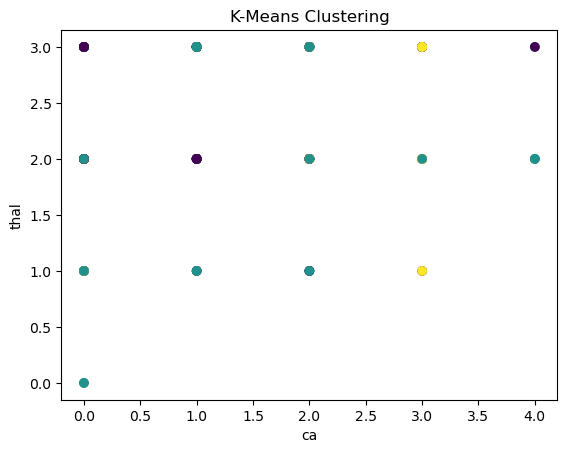

In [19]:
# Visualize the clusters
import matplotlib.pyplot as plt

plt.scatter(df['ca'], df['thal'], c=df['cluster'], cmap='viridis')
plt.xlabel('ca')
plt.ylabel('thal')
plt.title('K-Means Clustering')
plt.show()


# Hierarchical Clustering
_Note_
1. X-axis: Represents the individual data points (or samples) in your dataset. Each label corresponds to a data point.

2. Y-axis: Represents the distance or dissimilarity between clusters.

_Interpreting the Dendrogram_
1. Leaves: The bottom-most points (leaves) on the dendrogram represent the individual data points.

2. Branches: As you move up the dendrogram, branches connect data points to form clusters. The height at which branches join indicates the distance (or dissimilarity) between the clusters being merged.

3. Height: The vertical axis indicates the distance or dissimilarity at which clusters are joined. Higher joins indicate greater dissimilarity between clusters.

_Objective_
1. Tall Single Branch: The very tall branch on the left suggests that there is a significant difference (dissimilarity) between some clusters in your data.

2. Cluster Formation: The smaller branches at the lower part of the dendrogram show where the data points or smaller clusters are merged to form larger clusters.

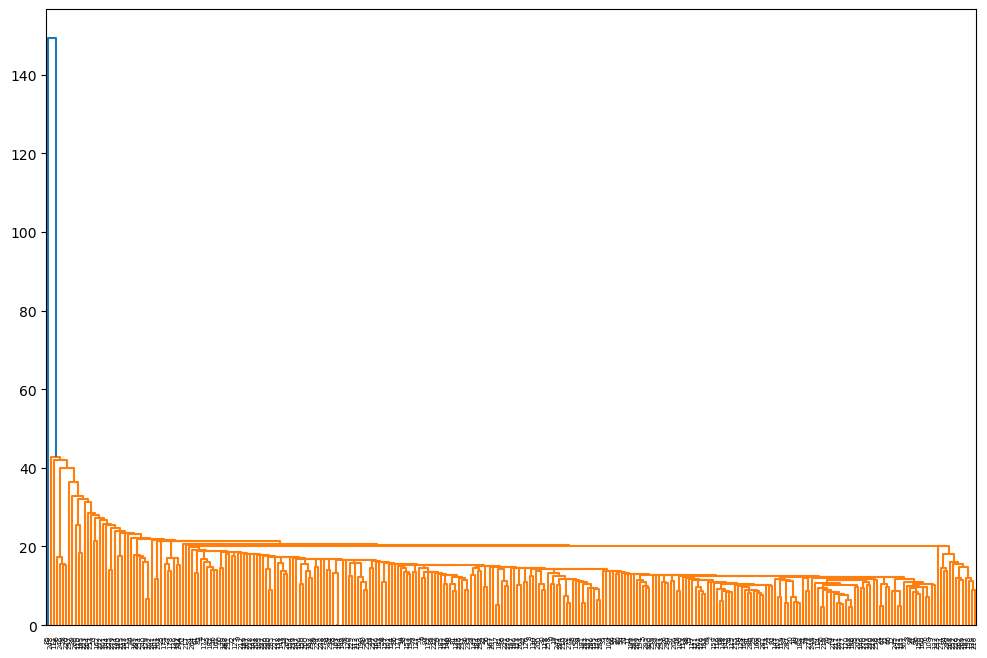

In [24]:
# Hierarchical Clustering
# Hierarchical Clustering creates a tree of clusters. 
# It can be either agglomerative (bottom-up) or divisive (top-down).

from scipy.cluster.hierarchy import dendrogram, linkage

# b) Hierarchical Clustering
df = pd.read_csv('heart.csv')
df = df.drop(columns=['target'])
# Hierarchical clustering
linked = linkage(df, 'single')

# Plotting dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked)
plt.show()


In [ ]:
# 2. Dimensionality Reduction
# Dimensionality reduction techniques reduce the number of random variables under consideration by 
# obtaining a set of principal variables. 
# This is useful for visualizing high-dimensional data and for improving the efficiency of other algorithms.

# Examples of Dimensionality Reduction Algorithms:
# a) Principal Component Analysis (PCA)
#    PCA transforms the data into a set of orthogonal components that explain the maximum variance in the data.

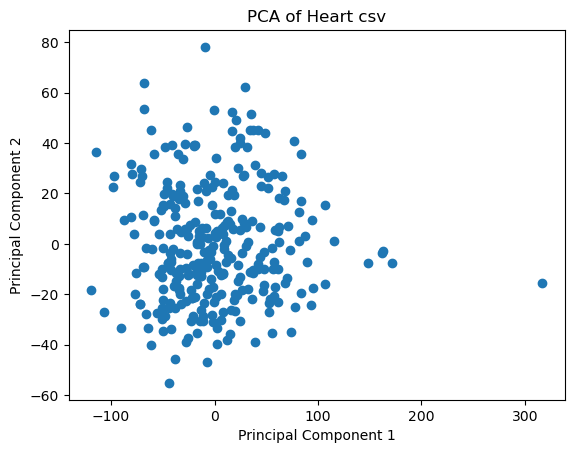

In [26]:
# PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)

# Plotting the principal components
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Heart csv')
plt.show()

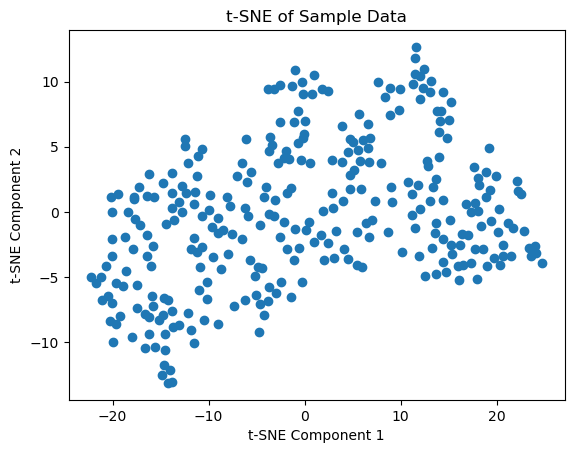

In [27]:
# b) t-Distributed Stochastic Neighbor Embedding (t-SNE)
#    t-SNE is a nonlinear dimensionality reduction technique particularly well suited for 
#    visualizing high-dimensional data.
from sklearn.manifold import TSNE
# t-SNE
tsne = TSNE(n_components=2, perplexity=30)
tsne_results = tsne.fit_transform(df)

# Plotting t-SNE results
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Heart Data')
plt.show()

In [28]:
# b) Association rule
#    Association rule learning finds interesting relationships (associations) among a large set of data items. 
#    It is often used in market basket analysis.
from mlxtend.frequent_patterns import apriori, association_rules



ModuleNotFoundError: No module named 'mlxtend'